In [215]:
#importando as bibliotecas que serão utilizadas no programa: 
import pandas as pd
import datetime as dt
import numpy as np
import requests
import matplotlib as mt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import requests 
from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)
import xlwings as xw

In [188]:
# coleta os feriados nacionais de 2001 a 2078 de um excel:
feriados = str(r'C:\Users\patri\OneDrive - Insper - Institudo de Ensino e Pesquisa\INSPER\INSPER\AULA FINANÇAS\FIN III\APS FINAL\feriados_nacionais.xlsx')
df_feriado = pd.read_excel(feriados)

#transforma os dados da coluna 'Data', que não forem datas, em NAN. Em seguida, delete linhas que tem datas NAN:
for i in range(len(df_feriado)):
    if str(type(df_feriado.loc[i,"Data"])) != "<class 'datetime.datetime'>":
        df_feriado.loc[i,"Data"] = np.nan  #se o elemento não for uma data, troca o conteúdo por NAN
df_feriado=df_feriado.dropna(subset=["Data"])

#obtém os feriados existentes e armazena para cada feriado as datas em que ocorrem:
dias_feriados = df_feriado['Data'].tolist()
for i in range(len(dias_feriados)):
    dias_feriados[i] = dias_feriados[i].date() 

#print(df_feriado)
#print(dias_feriados)

In [189]:
#inibe o aviso por abrir sites da B3 com certificado vencido:
from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

# define um dicionário com meses da B3 equivalente com as letras dos vencimentos de contratos:
meses_vencimento_B3 = {"F": 1,
           "G" :2,
           "H" :3,
           "J" : 4,
           "K" : 5,
           "M" : 6,
           "N" : 7,
           "Q" : 8,
           "U" :9,
           "V" : 10,
           "X" : 11,
           "Z" :12}

#importacao de vencimentos de contratos DI da B3 da aba:https://www.b3.com.br/pt_br/market-data-e-indices/servicos-de-dados/market-data/historico/derivativos/ajustes-do-pregao/
html_B3 = "https://www2.bmf.com.br/pages/portal/bmfbovespa/lumis/lum-ajustes-do-pregao-ptBR.asp"

#pega os dados requeridos do site da B3 usando como data o dia de hoje: 
html_dados = requests.get(html_B3,verify=False).text  #verify verifica o certificado Transport Layer Security (TLS) do site
data_hoje=html_dados[html_dados.find("frmBD);")+16:html_dados.find("frmBD);")+26]
data_hoje=dt.date(day=int(data_hoje[0:2]),month=int(data_hoje[3:5]),year=int(data_hoje[6:]))

#lê a tabela obtida no site da B3, que está no formato de html, e armazana na variável "dados":
dados=pd.read_html(htmlB3,thousands=".",decimal=",") #ainda, indica os separadores decimais e de milhar

#"dados" é uma lista de dataframes e me interessa o df 0:
dados = dados[0]

#acerta nomes das mercadorias em linhas com nan:
nomes_nan = dados.loc[0,"Mercadoria"] 
for i in range(len(dados)):
    if pd.isna(dados.loc[i,"Mercadoria"]):
        dados.loc[i,"Mercadoria"]=nomes_nan
    else: nomes_nan = dados.loc[i,"Mercadoria"] 
  
 #cria um Data Frame, "df_DI", a partir do Data Frame "dados", coletando somente os dados de contratos DI de 1 dia e reseta o index do Data Frame: 
df_DI = pd.DataFrame(dados[dados["Mercadoria"]=="DI1 - DI de 1 dia"]) 
df_DI.reset_index(inplace=True, drop=True)
#df_DI

In [190]:
# cria uma coluna com a data de exercicio dos contratos, ainda, ajusta para o primeiro dia util de cada mês:
for i in range(len(df_DI)):
    ano = int(df_DI.loc[i,"Vencimento"][1:3]) + 2000 #a variável "ano" armazena o ano que aparece nas datas de vencimento, ex: M22, portanto, o 22 e adiciona 2000, chegando em 2022
    dia = 1 #para o primeiro dia do mês
    mes = meses_vencimento_B3[df_DI.loc[i,"Vencimento"][0]] #utiliza o dicionário criado anteriormente, "meses_vencimento_B3", no vencimento do contrato, ex:M22, nesse caso o M para identificar o mês do vencimento, para M seria junho por exemplo
    df_DI.loc[i,"Exercicio"] = np.busday_offset(dt.date(ano,mes,dia),0, holidays = dias_feriados, roll = "forward").astype(dt.datetime) #para uma nova coluna, "Exercicio", constrói uma data usando as variáveis anteriores e levando em conta os feriados
df_DI

Mercadoria Vencimento  Preço de ajuste anterior  \
0   DI1 - DI de 1 dia        N22                  99040.34   
1   DI1 - DI de 1 dia        Q22                  98021.86   
2   DI1 - DI de 1 dia        U22                  96901.86   
3   DI1 - DI de 1 dia        V22                  95883.52   
4   DI1 - DI de 1 dia        X22                  94919.18   
5   DI1 - DI de 1 dia        Z22                  93956.63   
6   DI1 - DI de 1 dia        F23                  92922.23   
7   DI1 - DI de 1 dia        G23                  91881.10   
8   DI1 - DI de 1 dia        H23                  91059.45   
9   DI1 - DI de 1 dia        J23                  90008.87   
10  DI1 - DI de 1 dia        K23                  89216.35   
11  DI1 - DI de 1 dia        M23                  88245.11   
12  DI1 - DI de 1 dia        N23                  87353.13   
13  DI1 - DI de 1 dia        V23                  84807.76   
14  DI1 - DI de 1 dia        F24                  82553.79   
15  DI1 - DI de 1 dia        J24                  80338.86   
16  DI1 - DI de 1 dia        N24                  78229.87   
17  DI1 - DI de 1 dia        V24                  76048.09   
18  DI1 - DI de 1 dia        F25                  74021.59   
19  DI1 - DI de 1 dia        J25                  72044.40   
20  DI1 - DI de 1 dia        N25                  70120.55   
21  DI1 - DI de 1 dia        V25                  67990.29   
22  DI1 - DI de 1 dia        F26                  66095.47   
23  DI1 - DI de 1 dia        J26                  64195.55   
24  DI1 - DI de 1 dia        N26                  62544.65   
25  DI1 - DI de 1 dia        V26                  60502.71   
26  DI1 - DI de 1 dia        F27                  58936.41   
27  DI1 - DI de 1 dia        J27                  57398.50   
28  DI1 - DI de 1 dia        F28                  52450.47   
29  DI1 - DI de 1 dia        F29                  46560.28   
30  DI1 - DI de 1 dia        F30                  41379.34   
31  DI1 - DI de 1 dia        F31                  36617.27   
32  DI1 - DI de 1 dia        F32                  32517.43   
33  DI1 - DI de 1 dia        F33                  28857.83   
34  DI1 - DI de 1 dia        F34                  25639.31   
35  DI1 - DI de 1 dia        F35                  22863.25   
36  DI1 - DI de 1 dia        F36                  20337.42   
37  DI1 - DI de 1 dia        F37                  18062.92   

    Preço de ajuste Atual  Variação  Valor do ajuste por contrato (R$)  \
0                99039.58     -0.76                               0.76   
1                98021.30     -0.56                               0.56   
2                96900.21     -1.65                               1.65   
3                95879.90     -3.62                               3.62   
4                94912.71     -6.47                               6.47   
5                93947.97     -8.66                               8.66   
6                92910.37    -11.86                              11.86   
7                91863.61    -17.49                              17.49   
8                91036.41    -23.04                              23.04   
9                89978.39    -30.48                              30.48   
10               89181.14    -35.21                              35.21   
11               88204.34    -40.77                              40.77   
12               87305.75    -47.38                              47.38   
13               84744.69    -63.07                              63.07   
14               82474.42    -79.37                              79.37   
15               80236.17   -102.69                             102.69   
16               78115.31   -114.56                             114.56   
17               75918.94   -129.15                             129.15   
18               73876.64   -144.95                             144.95   
19               71889.98   -154.42                             154.42   
20               69957.29   -163.26   

In [191]:
#calcula o número de dias úteis de hoje até o exercício e armazena em uma nova coluna do Data Frame:
df_DI['DU'] = df_DI.apply(lambda row : np.busday_count(data_hoje, row["Exercicio"], holidays = dias_feriados),axis=1) #calcula os dias úteis, levando em conta os feriados coletados no excel anterior, até o vencimento de um contrato
df_DI

Mercadoria Vencimento  Preço de ajuste anterior  \
0   DI1 - DI de 1 dia        N22                  99040.34   
1   DI1 - DI de 1 dia        Q22                  98021.86   
2   DI1 - DI de 1 dia        U22                  96901.86   
3   DI1 - DI de 1 dia        V22                  95883.52   
4   DI1 - DI de 1 dia        X22                  94919.18   
5   DI1 - DI de 1 dia        Z22                  93956.63   
6   DI1 - DI de 1 dia        F23                  92922.23   
7   DI1 - DI de 1 dia        G23                  91881.10   
8   DI1 - DI de 1 dia        H23                  91059.45   
9   DI1 - DI de 1 dia        J23                  90008.87   
10  DI1 - DI de 1 dia        K23                  89216.35   
11  DI1 - DI de 1 dia        M23                  88245.11   
12  DI1 - DI de 1 dia        N23                  87353.13   
13  DI1 - DI de 1 dia        V23                  84807.76   
14  DI1 - DI de 1 dia        F24                  82553.79   
15  DI1 - DI de 1 dia        J24                  80338.86   
16  DI1 - DI de 1 dia        N24                  78229.87   
17  DI1 - DI de 1 dia        V24                  76048.09   
18  DI1 - DI de 1 dia        F25                  74021.59   
19  DI1 - DI de 1 dia        J25                  72044.40   
20  DI1 - DI de 1 dia        N25                  70120.55   
21  DI1 - DI de 1 dia        V25                  67990.29   
22  DI1 - DI de 1 dia        F26                  66095.47   
23  DI1 - DI de 1 dia        J26                  64195.55   
24  DI1 - DI de 1 dia        N26                  62544.65   
25  DI1 - DI de 1 dia        V26                  60502.71   
26  DI1 - DI de 1 dia        F27                  58936.41   
27  DI1 - DI de 1 dia        J27                  57398.50   
28  DI1 - DI de 1 dia        F28                  52450.47   
29  DI1 - DI de 1 dia        F29                  46560.28   
30  DI1 - DI de 1 dia        F30                  41379.34   
31  DI1 - DI de 1 dia        F31                  36617.27   
32  DI1 - DI de 1 dia        F32                  32517.43   
33  DI1 - DI de 1 dia        F33                  28857.83   
34  DI1 - DI de 1 dia        F34                  25639.31   
35  DI1 - DI de 1 dia        F35                  22863.25   
36  DI1 - DI de 1 dia        F36                  20337.42   
37  DI1 - DI de 1 dia        F37                  18062.92   

    Preço de ajuste Atual  Variação  Valor do ajuste por contrato (R$)  \
0                99039.58     -0.76                               0.76   
1                98021.30     -0.56                               0.56   
2                96900.21     -1.65                               1.65   
3                95879.90     -3.62                               3.62   
4                94912.71     -6.47                               6.47   
5                93947.97     -8.66                               8.66   
6                92910.37    -11.86                              11.86   
7                91863.61    -17.49                              17.49   
8                91036.41    -23.04                              23.04   
9                89978.39    -30.48                              30.48   
10               89181.14    -35.21                              35.21   
11               88204.34    -40.77                              40.77   
12               87305.75    -47.38                              47.38   
13               84744.69    -63.07                              63.07   
14               82474.42    -79.37                              79.37   
15               80236.17   -102.69                             102.69   
16               78115.31   -114.56                             114.56   
17               75918.94   -129.15                             129.15   
18               73876.64   -144.95                             144.95   
19               71889.98   -154.42                             154.42   
20               69957.29   -163.26   

In [192]:
#cria uma nova coluna no Data Frame que armazena as taxas spot, calculadas através do PU, dos contratos:
print('Qual o DI de hoje?')
print('OBS: colocar no seguinte formato: se for 12%, colocar 0.12')
DI_atual = float(input('DI de hoje -->'))

for i in range(len(df_DI)):
    if df_DI['DU'][i] <= 3:
        df_DI['Spot Rate'] = DI_atual
    else:
        df_DI['Spot Rate'] = df_DI.apply(lambda row : ((100000/row["Preço de ajuste anterior"])**(252/row["DU"]))-1,axis = 1)

Qual o DI de hoje?
OBS: colocar no seguinte formato: se for 12%, colocar 0.12


DI de hoje --> 0.1265


In [193]:
print('------------------------------------------------------------------------------------------------------------------')
print('Os dados foram coletados na data:',data_hoje)
df_DI
print('------------------------------------------------------------------------------------------------------------------')

Mercadoria Vencimento  Preço de ajuste anterior  \
0   DI1 - DI de 1 dia        N22                  99040.34   
1   DI1 - DI de 1 dia        Q22                  98021.86   
2   DI1 - DI de 1 dia        U22                  96901.86   
3   DI1 - DI de 1 dia        V22                  95883.52   
4   DI1 - DI de 1 dia        X22                  94919.18   
5   DI1 - DI de 1 dia        Z22                  93956.63   
6   DI1 - DI de 1 dia        F23                  92922.23   
7   DI1 - DI de 1 dia        G23                  91881.10   
8   DI1 - DI de 1 dia        H23                  91059.45   
9   DI1 - DI de 1 dia        J23                  90008.87   
10  DI1 - DI de 1 dia        K23                  89216.35   
11  DI1 - DI de 1 dia        M23                  88245.11   
12  DI1 - DI de 1 dia        N23                  87353.13   
13  DI1 - DI de 1 dia        V23                  84807.76   
14  DI1 - DI de 1 dia        F24                  82553.79   
15  DI1 - DI de 1 dia        J24                  80338.86   
16  DI1 - DI de 1 dia        N24                  78229.87   
17  DI1 - DI de 1 dia        V24                  76048.09   
18  DI1 - DI de 1 dia        F25                  74021.59   
19  DI1 - DI de 1 dia        J25                  72044.40   
20  DI1 - DI de 1 dia        N25                  70120.55   
21  DI1 - DI de 1 dia        V25                  67990.29   
22  DI1 - DI de 1 dia        F26                  66095.47   
23  DI1 - DI de 1 dia        J26                  64195.55   
24  DI1 - DI de 1 dia        N26                  62544.65   
25  DI1 - DI de 1 dia        V26                  60502.71   
26  DI1 - DI de 1 dia        F27                  58936.41   
27  DI1 - DI de 1 dia        J27                  57398.50   
28  DI1 - DI de 1 dia        F28                  52450.47   
29  DI1 - DI de 1 dia        F29                  46560.28   
30  DI1 - DI de 1 dia        F30                  41379.34   
31  DI1 - DI de 1 dia        F31                  36617.27   
32  DI1 - DI de 1 dia        F32                  32517.43   
33  DI1 - DI de 1 dia        F33                  28857.83   
34  DI1 - DI de 1 dia        F34                  25639.31   
35  DI1 - DI de 1 dia        F35                  22863.25   
36  DI1 - DI de 1 dia        F36                  20337.42   
37  DI1 - DI de 1 dia        F37                  18062.92   

    Preço de ajuste Atual  Variação  Valor do ajuste por contrato (R$)  \
0                99039.58     -0.76                               0.76   
1                98021.30     -0.56                               0.56   
2                96900.21     -1.65                               1.65   
3                95879.90     -3.62                               3.62   
4                94912.71     -6.47                               6.47   
5                93947.97     -8.66                               8.66   
6                92910.37    -11.86                              11.86   
7                91863.61    -17.49                              17.49   
8                91036.41    -23.04                              23.04   
9                89978.39    -30.48                              30.48   
10               89181.14    -35.21                              35.21   
11               88204.34    -40.77                              40.77   
12               87305.75    -47.38                              47.38   
13               84744.69    -63.07                              63.07   
14               82474.42    -79.37                              79.37   
15               80236.17   -102.69                             102.69   
16               78115.31   -114.56                             114.56   
17               75918.94   -129.15                             129.15   
18               73876.64   -144.95                             144.95   
19               71889.98   -154.42                             154.42   
20               69957.29   -163.26   

In [200]:
#cálculo da taxa forward:
df_forward = pd.DataFrame() #criação de um Data Frame auxiliar para realizar as contas da Taxa Forward
df_forward['taxa DI'] = df_DI["Spot Rate"]
df_forward["vencimento"] = df_DI["Exercicio"] 
df_forward["DU"] = df_DI['DU']
df_forward["tx_aa"] = 0
df_forward["divisao"] = 0
df_forward["du/252"] = 0

#iterção na qual são calculadas etapas para o cálculo da taxa forward: 
i = 0
for i in range (len(df_forward)):
    df_forward['tx_aa'].iloc[i] = (1+df_forward['taxa DI'].iloc[i])**(df_forward['DU'].iloc[i]/252) #uma taxa DI em relação ao seu dia útil e contando o ano como 252 dias
    if i>0:
        df_forward['divisao'].iloc[i]= df_forward['tx_aa'].iloc[i]/df_forward['tx_aa'].iloc[i-1] #uma parcela intermediária que faz a divisão das taxas no instante e do instante anterior
        
for i in range (len(df_forward)):
    if i>0:
        df_forward["du/252"].iloc[i]=252/(df_forward["DU"].iloc[i]-df_forward["DU"].iloc[i-1]) #apenas a divisão de 252 pelo delta dias (vencimento x - vencimento x-1)

#finalmente, o cálculo final da taxa forward,  que é armazenada em uma nova coluna
df_forward['Forward Rate']=0
for i in range (len(df_forward)):
    if i>0:
        df_forward['Forward Rate'].iloc[i]=(df_forward['divisao'].iloc[i]**(df_forward['du/252'].iloc[i]))-1
    else:
        df_forward['Forward Rate'].iloc[i] = df_forward["taxa DI"].iloc[i] #caso seja o primeiro contrato a taxa forward é a própria taxa spot 

# criação de outro Data Frame para armazenar as colunas necessárias para a questão, e exportá-la para um arquivo .xlsx
DI_Foward = pd.DataFrame()
DI_Foward["Vértices"] = df_forward["vencimento"]
DI_Foward["Taxa Spot"] = df_forward["taxa DI"]*100
DI_Foward["DU"] = df_forward["DU"]
DI_Foward["Fator d.u."] = (1+df_forward["Forward Rate"])**(1/252)
DI_Foward["Taxa Forward"] = df_forward["Forward Rate"]*100
print(DI_Foward)

      Vértices  Taxa Spot    DU  Fator d.u.  Taxa Forward
0   2022-07-01  12.919060    20    1.000482     12.919060
1   2022-08-01  13.066039    41    1.000492     13.206197
2   2022-09-01  13.192409    64    1.000500     13.418028
3   2022-10-03  13.272311    85    1.000503     13.516170
4   2022-11-01  13.331452   105    1.000506     13.583146
5   2022-12-01  13.390925   125    1.000510     13.703671
6   2023-01-02  13.410189   147    1.000503     13.519704
7   2023-02-01  13.457792   169    1.000512     13.776378
8   2023-03-01  13.452309   187    1.000499     13.400843
9   2023-04-03  13.463879   210    1.000505     13.557998
10  2023-05-02  13.441490   228    1.000491     13.180605
11  2023-06-01  13.434151   250    1.000498     13.358124
12  2023-07-03  13.397772   271    1.000484     12.965579
13  2023-10-02  13.196637   335    1.000462     12.348903
14  2024-01-02  12.975829   396    1.000442     11.770848
15  2024-04-01  12.830395   457    1.000446     11.890815
16  2024-07-01

C:\Users\patri\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [206]:
#Construção da ETTJ com interpolação diária:
ultimo = DI_Foward['DU'].max()*1
ettj=pd.DataFrame({'Dias':range(1,ultimo + 1)}) #criação de um Data Frame para os valores de ETTJ

#gera colunas para o DataFrame criado
ettj['Taxa DI'] = 0
ettj['Fator d.u.'] = 0
ettj['Fator Acm'] = 0
ettj['ETTJ aa'] = 0
ettj['Taxa Forward'] = 0
ettj['Taxa Anterior'] = 0
ettj['DU'] = 0

#iteração que adiciona ao DataFrame criado valores já calculados anteriormente:
i=0
j=0
while i<(DI_Foward['DU'].iloc[-1]-1):
    if ettj['Dias'].iloc[i]<=DI_Foward['DU'].iloc[j]:
        ettj['Taxa Forward'].iloc[i]= DI_Foward['Taxa Forward'].iloc[j]
        ettj['Taxa DI'].iloc[i]=DI_Foward['Taxa Spot'].iloc[j]
        ettj['DU'].iloc[i]=DI_Foward['DU'].iloc[j]
        i=i+1
    else:
        j=j+1
        
#iteração que calcula a ETTJ: 
for i in range(len(ettj)):
        if i == 0:
            ettj['Fator d.u.'].iloc[i] = (1+ettj['Taxa DI'].iloc[i])**(1/252)
            ettj['Fator Acm'].iloc[i] =  ettj['Fator d.u.'].iloc[i]
            ettj['ETTJ aa'].iloc[i] = (ettj['Fator Acm'].iloc[i])**(252/ettj['Dias'].iloc[i])-1            
        else:    
            ettj['Fator d.u.'].iloc[i] = (1+ettj['Taxa DI'].iloc[i])**(1/252)
            ettj['Fator Acm'].iloc[i] =  ettj['Fator Acm'].iloc[i-1]*ettj['Fator d.u.'].iloc[i]
            ettj['ETTJ aa'].iloc[i] = (ettj['Fator Acm'].iloc[i])**(252/ettj['Dias'].iloc[i])-1

#finalmente, retira colunas que não são necessária para a questão:
ettj = ettj.drop(columns = ['Taxa Anterior'])   
ettj = ettj.drop(columns = ['Taxa Forward'])            
ettj = ettj.drop(columns = ['DU'])            
ettj

Dias    Taxa DI  Fator d.u.     Fator Acm    ETTJ aa
0        1  12.919060    1.010504  1.010504e+00  12.919060
1        2  12.919060    1.010504  1.021119e+00  12.919060
2        3  12.919060    1.010504  1.031845e+00  12.919060
3        4  12.919060    1.010504  1.042684e+00  12.919060
4        5  12.919060    1.010504  1.053636e+00  12.919060
...    ...        ...         ...           ...        ...
3660  3661  12.486956    1.010378  2.673439e+16  12.512485
3661  3662  12.486956    1.010378  2.701183e+16  12.512478
3662  3663  12.486956    1.010378  2.729215e+16  12.512471
3663  3664  12.486956    1.010378  2.757539e+16  12.512464
3664  3665   0.000000    1.000000  2.757539e+16  12.502869

[3665 rows x 5 columns]

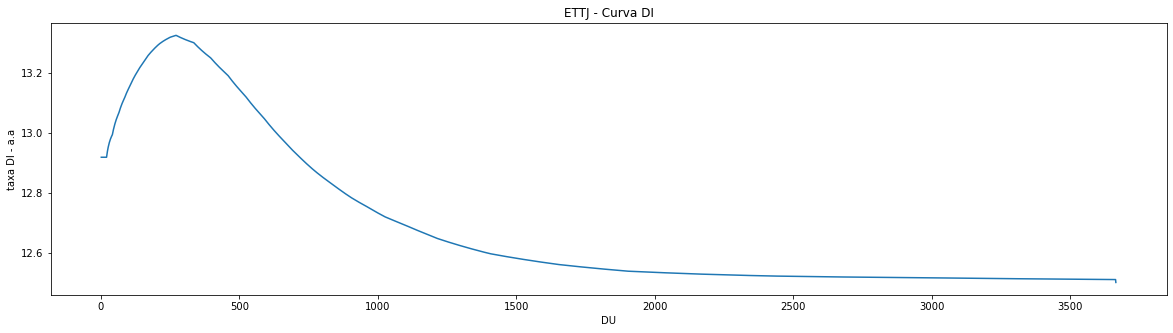

In [213]:
#gráfico da curva DI:
fig = plt.figure(figsize=(20,5))
plt.plot(ettj['Dias'],ettj['ETTJ aa'])
plt.title('ETTJ - Curva DI')
plt.xlabel('DU')
plt.ylabel('taxa DI - a.a')
plt.show()

In [216]:
#Aplicação para calcular os titúlos públicos
wb = xw.Book("Excel_Name.xlsx")
Sheet = wb.sheets["Sheets_name.xlsx"]
App = pd.DataFrame(Sheet.range("Range (Ex: A5:C30)").value, columns = ["Data","D.U","Fluxo"])
Cotacao = pd.DataFrame(Sheet.cells("Cell (Ex:E1)").value, columns = ["Data","D.U","Fluxo"])

valor_do_titulo=1000
App['fator']   = 0
App['VP']   = 0

for i in range(len(App)):
    App["fator"].iloc[i] = (App["fluxo"].iloc[i]/valor_do_titulo)**(App["D.U"].iloc[i]/252)
    App["VP"].iloc[i] =  app["fluxo"].iloc[i]/App["fator"].iloc[i]
    Sheet.cells(i,5).value = App["Fator"].iloc[i]
    Sheet.cells(i,6).value = App["VP"].iloc[i]
    
tabela['VP'].sum()

Sheet.cells("Cell (Ex:E2)").value = tabela['VP'].sum()

Diferença = (Cotacao / tabela['VP'].sum() - 1)*100

print("O titúlo está mais barto em ", Diferença)

FileNotFoundError: No such file: 'excel_name.xlsx'